In [ ]:
#loan_status_prediction is a supervised calssification learning so we can use svm or logistic regression and it a binary classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset=pd.read_csv('/content/loan_status_prediction.csv')



In [ ]:
dataset.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
dataset.replace({'Dependents':{'3+':4},'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Urban':1,'Rural':0,'Semiurban':2}},inplace=True)

In [ ]:
dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
dataset=dataset.dropna()

In [ ]:
#here dropna is used fill the missing values

In [ ]:

dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dataset.value_counts()

Loan_ID   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  1.0     1.0      1           1          0.0            4583             1508.0             128.0       360.0             1.0             0              0              1
LP001005  1.0     1.0      0           1          1.0            3000             0.0                66.0        360.0             1.0             1              1              1
LP002347  1.0     1.0      0           1          0.0            3246             1417.0             138.0       360.0             1.0             2              1              1
LP002345  1.0     1.0      0           1          0.0            1025             2773.0             112.0       360.0             1.0             0              1              1
LP002342  1.0     1.0      2           1          1.0            1600             20000.0            239.0    

In [ ]:
dataset.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.108333,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.822906,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [ ]:
dataset['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

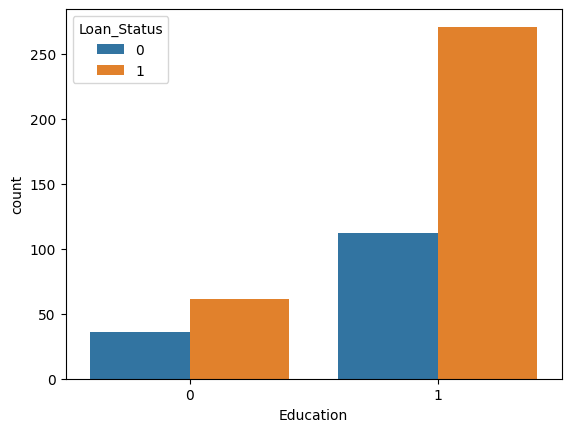

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

<Axes: xlabel='Married', ylabel='count'>

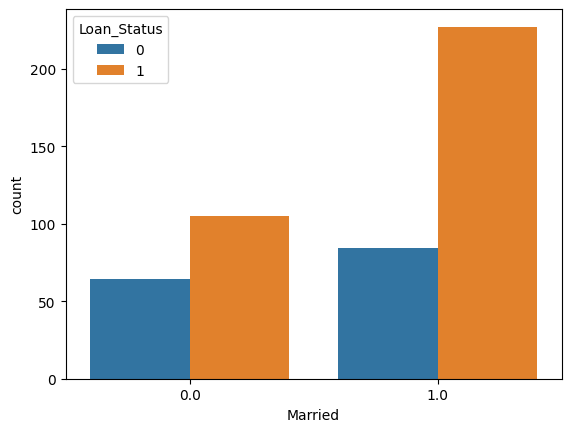

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

In [ ]:
X=dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
5       1.0      1.0          2          1            1.0             5417   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
dataset.shape

(480, 13)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.1,stratify=Y)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
X_train_prediction=Model.predict(X_train)
accuracy=accuracy_score(X_train_prediction,Y_train)


In [ ]:
print(accuracy*100)

In [ ]:
X_test_prediction=Model.predict(X_test)
accuracyScore=accuracy_score(X_test_prediction,Y_test)


In [ ]:
print(accuracyScore)

In [ ]:
input_data=()
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction = Model.predict(input_data_reshaped)
print(prediction)
if (prediction==1):
  print("active loan status")
else:
  print("non-active loan status")